In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/LucaZancato/ML2020-2021/main/kc_house_data.csv"

data = pd.read_csv(url, sep=',')

# Remove the data samples with missing values (NaN)
data = data.dropna()
# Remove the houses with waterfront
data = data.drop(data[data['waterfront']==1].index)
# Remove the columns we are not going to use
data = data.drop(columns=['id', 'date','waterfront'])
# Have a brief description of the dataset

data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.133000e+03,3133.00000,3133.000000,3133.000000,3.133000e+03,3133.000000,3133.000000,3133.000000,3133.000000,3133.00000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000
mean,5.215503e+05,3.38270,2.064395,2057.023300,1.504079e+04,1.432493,0.210022,3.456751,7.604532,1751.96489,305.058410,1967.499202,91.785828,98077.015640,47.557970,-122.211718,1975.721992,13058.278966
std,3.287423e+05,0.89238,0.755714,893.008107,4.181746e+04,0.506179,0.696599,0.681677,1.147630,798.72648,451.879253,28.109695,418.255205,54.133958,0.141078,0.139451,680.033180,25419.485855
min,7.500000e+04,0.00000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,1.000000,3.000000,380.00000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.502000,620.000000,660.000000
25%,3.150000e+05,3.00000,1.500000,1422.000000,5.427000e+03,1.000000,0.000000,3.000000,7.000000,1190.00000,0.000000,1950.000000,0.000000,98032.000000,47.459800,-122.324000,1480.000000,5413.000000
50%,4.420000e+05,3.00000,2.000000,1900.000000,7.956000e+03,1.000000,0.000000,3.000000,7.000000,1540.00000,0.000000,1969.000000,0.000000,98059.000000,47.572600,-122.226000,1830.000000,7818.000000
75%,6.350000e+05,4.00000,2.500000,2490.000000,1.111100e+04,2.000000,0.000000,4.000000,8.000000,2130.00000,600.000000,1990.000000,0.000000,98117.000000,47.680500,-122.124000,2350.000000,10300.000000
max,5.350000e+06,8.00000,5.500000,8000.000000,1.651359e+06,3.500000,4.000000,5.000000,12.000000,6720.00000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


In [3]:
# Print first 5 datapoints of the dataset
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [4]:
# Let's split data into train and test using sklearn built-in function: train_test_split
m_t, m = 100, len(data)
m_test = m - m_t

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=m_test/m)

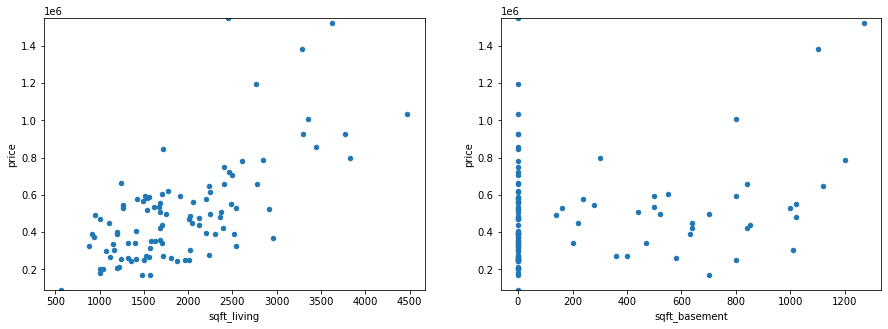

In [5]:
# Let's check the price trend as a function of the sqrt_living and sqrt_basement (separately)

def plot_single_feature_vs_y(feature, train_data, ax=None, y='price'):
    reduced_data = pd.concat([train_data[y], train_data[feature]], axis=1)
    reduced_data.plot.scatter(x=feature, y=y, ylim=(train_data[y].min(), train_data[y].max()), ax=ax)

fig, axes = plt.subplots(1,2, figsize=(15,5))
plot_single_feature_vs_y('sqft_living', train_data, ax=axes[0])
plot_single_feature_vs_y('sqft_basement', train_data, ax=axes[1])

In [6]:
# Let's explore data and features distributions using box plots
def box_plot_single_feature_vs_y(feature, train_data):
    plt.figure(figsize=(15,10))
    reduced_data = pd.concat([train_data['price'], train_data[feature]], axis=1)
    sns.boxplot(x=feature, y="price", data=reduced_data)

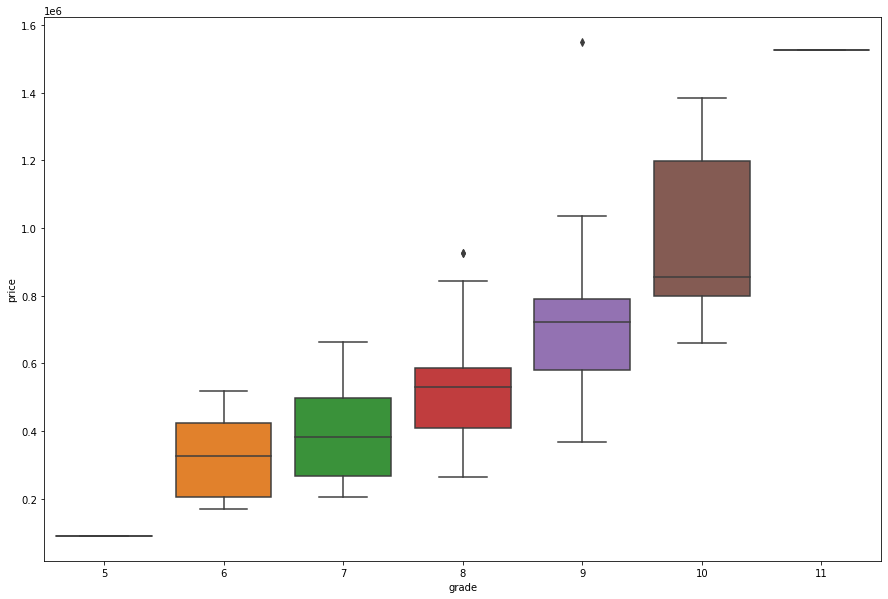

In [7]:
# Prices over 'grade'

box_plot_single_feature_vs_y('grade', train_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1905'),
  Text(2, 0, '1908'),
  Text(3, 0, '1909'),
  Text(4, 0, '1915'),
  Text(5, 0, '1920'),
  Text(6, 0, '1921'),
  Text(7, 0, '1925'),
  Text(8, 0, '1926'),
  Text(9, 0, '1927'),
  Text(10, 0, '1929'),
  Text(11, 0, '1937'),
  Text(12, 0, '1938'),
  Text(13, 0, '1941'),
  Text(14, 0, '1942'),
  Text(15, 0, '1944'),
  Text(16, 0, '1945'),
  Text(17, 0, '1949'),
  Text(18, 0, '1950'),
  Text(19, 0, '1951'),
  Text(20, 0, '1952'),
  Text(21, 0, '1953'),
  Text(22, 0, '1954'),
  Text(23, 0, '1955'),
  Text(24, 0, '1956'),
  Text(25, 0, '1958'),
  Text(26, 0, '1959'),
  Text(27, 0, '1960'),
  Text(28, 0, '1961'),
  Text(29, 0, '1962'),
  Text(30, 0, '1963'),
  Text(31, 0, '1964

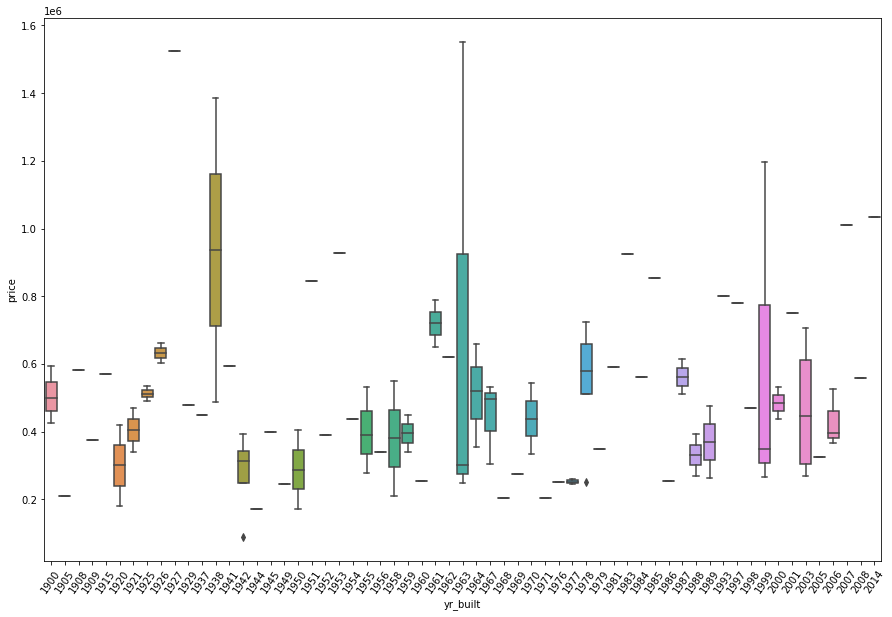

In [8]:
# Prices over 'yr_built'

box_plot_single_feature_vs_y('yr_built', train_data)
plt.xticks(rotation=55)

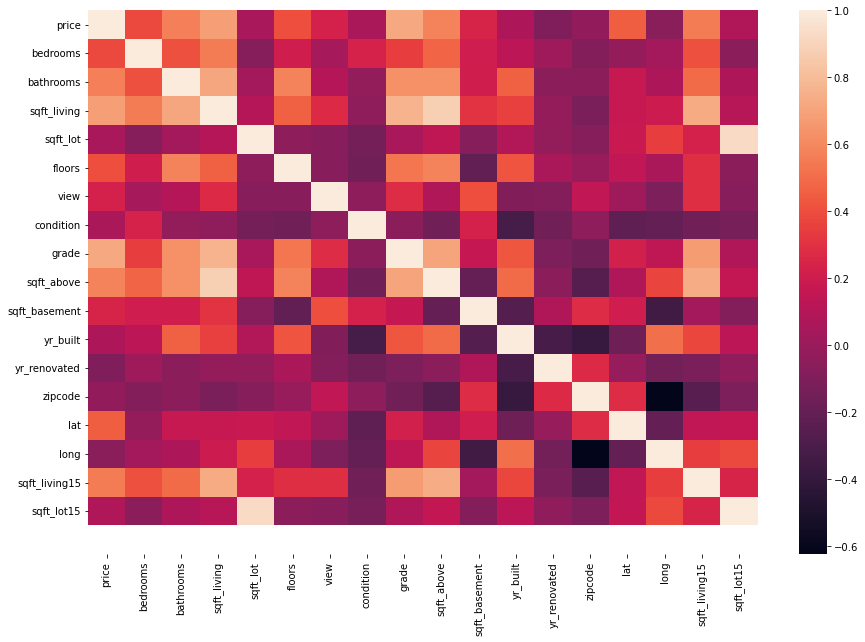

In [9]:
# Let's' try to make the process we followed up to now a little bit more systematic: we will use a pandas 
# built-in function to plot the correlation matrix between all the features and the regression variables.

def plot_correlation_matrix(df_train):
    plt.subplots(figsize=(15, 10))
    corr_matrix = df_train.corr()
    ax = sns.heatmap(corr_matrix, vmax=1, square=False)
    ax.set_ylim(19, 0)
    return corr_matrix

corr_matrix = plot_correlation_matrix(train_data)

(19.0, 0.0)

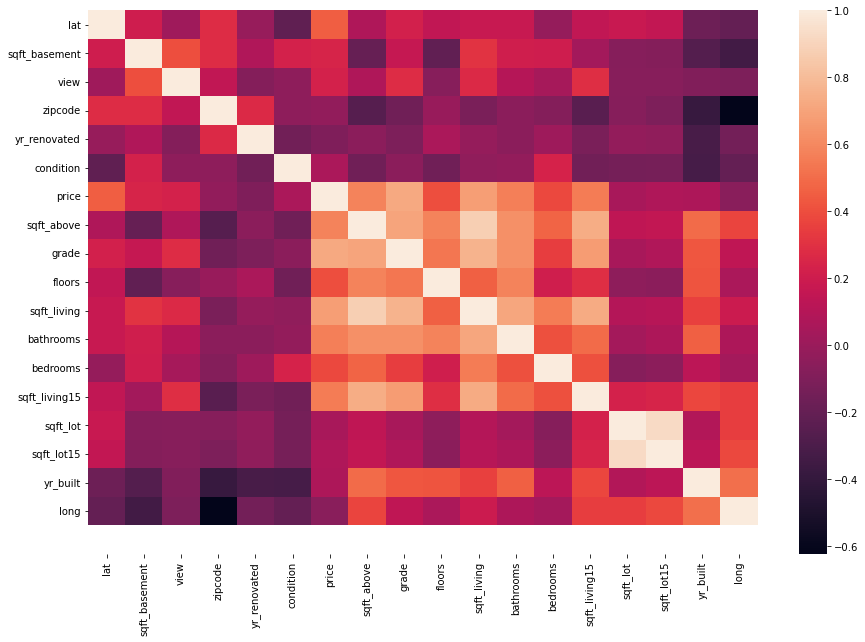

In [10]:
# Previous correlation matrix is not ordered, we need to sort its entries such that we can cluster the most 
# correlated variables. In this way it will be easier to read the correlation matrix.

import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False) -> pd.DataFrame:
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    :param corr_array: pandas.DataFrame or numpy.ndarray a NxN correlation matrix 
        
    :returns: A NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

plt.subplots(figsize=(15, 10))
corr_matrix = cluster_corr(corr_matrix, inplace=False)
ax = sns.heatmap(corr_matrix, vmax=1, square=False)
ax.set_ylim(19, 0)

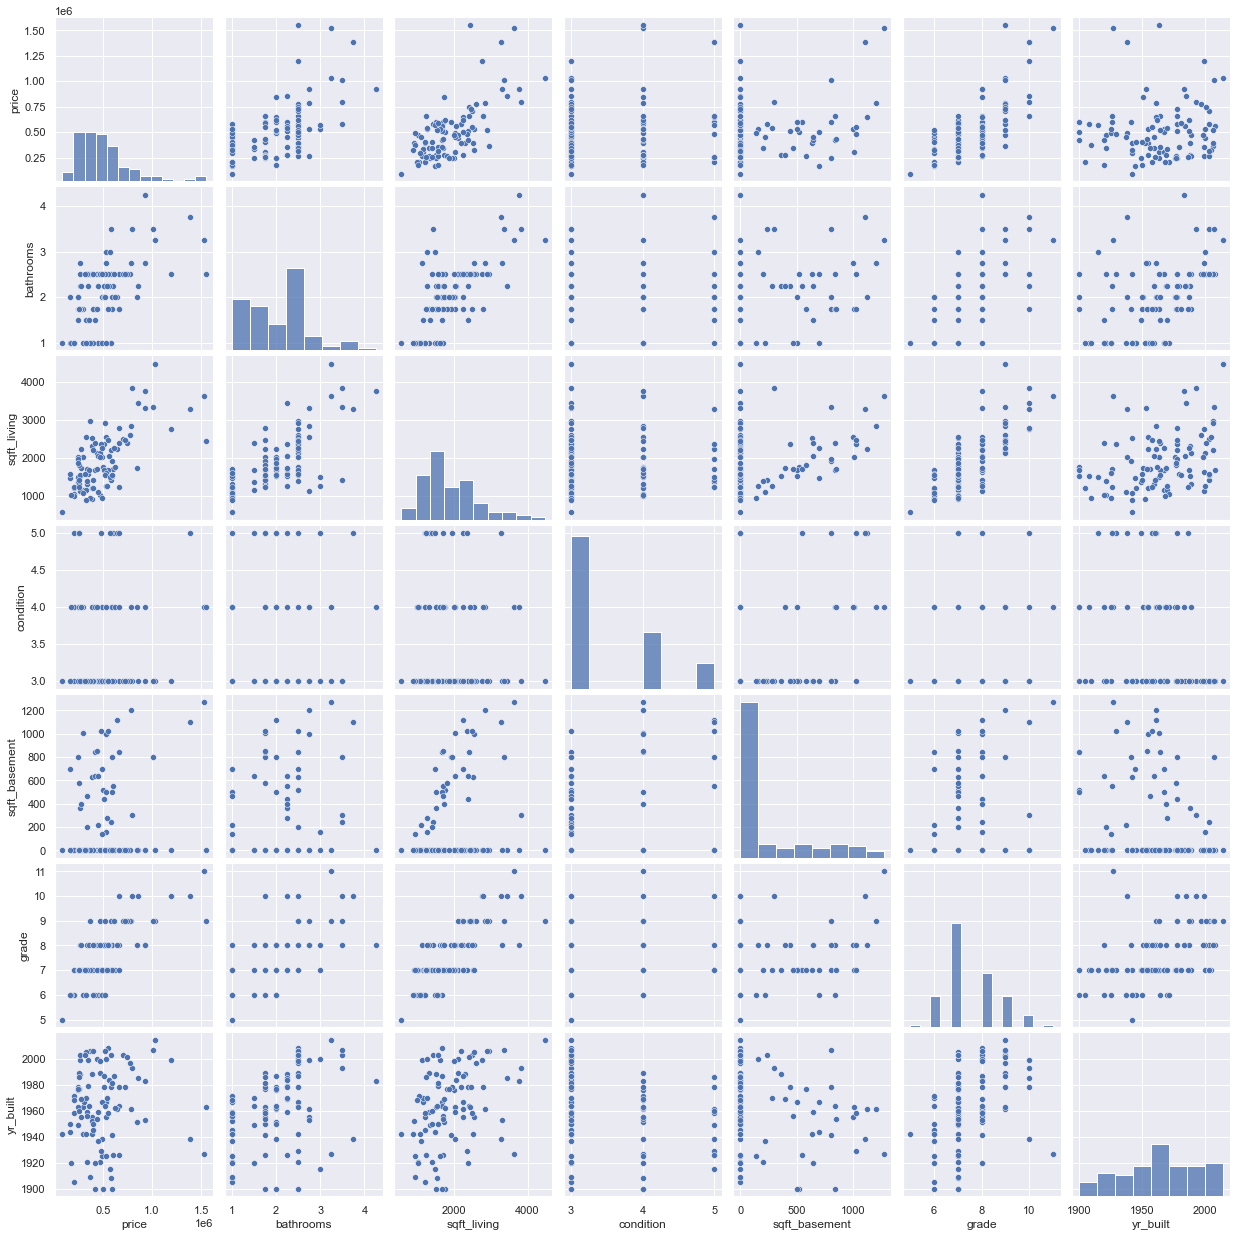

In [11]:
# Let's have a look at some scatter plots (in the main diagonal there is a histogram with the actual data)
sns.set()
cols = ['price', 'bathrooms', 'sqft_living', 'condition', 'sqft_basement', 'grade', 'yr_built']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()
# As we see in the correlation matrix 'condition' and 'yr_build' are very poorly correlated

In [12]:
# Let's now standardize the data as we did in the past homeworks
features_names = train_data.columns[1:]
x_train, y_train = train_data[features_names].values.astype('float'), train_data['price'].values.astype('float')
x_test, y_test = test_data[features_names].values.astype('float'), test_data['price'].values.astype('float')

from sklearn import preprocessing
scaler_x = preprocessing.StandardScaler().fit(x_train)
x_train = scaler_x.transform(x_train)

scaler_y = preprocessing.StandardScaler().fit(y_train.reshape(-1,1))
y_train = scaler_y.transform(y_train.reshape(-1,1)).reshape(-1,)

x_test = scaler_x.transform(x_test)
y_test = scaler_y.transform(y_test.reshape(-1,1)).reshape(-1,)

In [13]:
# I wrote a function to compute the Least-Squares estimate using LinearRegression() from Scikit-learn given x_train and 
# y_train. The function must return the COD both for training and test dataset AND must return a vector containing 
# all the model parameters (both bias b and coefficients w)
from sklearn import linear_model 
def solve_LS_problem(x_train : np.ndarray, y_train : np.array, x_test : np.ndarray, y_test : np.array) -> tuple:
    
    model_train = linear_model.LinearRegression().fit(x_train, y_train)
                                         
    COD_train = model_train.score(x_train, y_train)
    COD_test = model_train.score(x_test, y_test)
    
    w = np.concatenate((model_train.intercept_.reshape(-1,), model_train.coef_))
    
    
    return (COD_train, COD_test, w)

In [14]:
COD_train_LS_full, COD_test_LS_full, w_LS_full = solve_LS_problem(x_train, y_train, x_test, y_test)
print(f"Coefficient of determination on training data: {COD_train_LS_full:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_LS_full:.4f}")
print(f"w_LS_full:{w_LS_full}")

assert w_LS_full.shape == (18,)
assert type(COD_train_LS_full) == np.float64 and COD_train_LS_full <= 1.0
assert type(COD_test_LS_full) == np.float64 and COD_test_LS_full <= 1.0

Coefficient of determination on training data: 0.7377
Coefficient of determination on test data:     0.6159
w_LS_full:[ 2.71198466e-14  4.97044832e-02  1.54377867e-01  1.15390311e-01
 -1.57028165e-01  3.51851390e-02  1.02223937e-02  4.34820427e-02
  4.30052189e-01  1.28765981e-01 -1.97652656e-02 -2.97298920e-01
 -9.66921775e-02 -1.11726640e-01  2.65421853e-01 -1.08611716e-01
  5.08168159e-02  1.67080304e-01]


In [15]:
print({index: feature for index, feature in enumerate(features_names)})

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'view', 6: 'condition', 7: 'grade', 8: 'sqft_above', 9: 'sqft_basement', 10: 'yr_built', 11: 'yr_renovated', 12: 'zipcode', 13: 'lat', 14: 'long', 15: 'sqft_living15', 16: 'sqft_lot15'}


In [16]:

COD_train_LS_reduced, COD_test_LS_reduced, w_LS_reduced = None, None, None  # Replace with proper values

hand_selected_features_indeces = [1,7,10,15] 
x_train_reduced, x_test_reduced = x_train[:, hand_selected_features_indeces], x_test[:, hand_selected_features_indeces]
COD_train_LS_reduced, COD_test_LS_reduced, w_LS_reduced = solve_LS_problem(x_train_reduced, y_train, x_test_reduced, y_test)  # Replace with proper values

def new_solve_LS_problem(x_train : np.ndarray, y_train : np.array, x_test : np.ndarray, y_test : np.array, indeces) -> tuple:
    
    x_train_new = x_train[:,indeces]
    x_test_new = x_test[:,indeces]
    model_train = linear_model.LinearRegression().fit(x_train, y_train)
                                         
    COD_train = model_train.score(x_train, y_train)
    COD_test = model_train.score(x_test, y_test)
    
    w = np.concatenate((model_train.intercept_.reshape(-1,), model_train.coef_))
    
    return (COD_train, COD_test, w)

print(f"Coefficient of determination on training data: {COD_train_LS_reduced:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_LS_reduced:.4f}")

Coefficient of determination on training data: 0.6540
Coefficient of determination on test data:     0.5874


In [17]:
# Let's get the validation dataset from the training dataset 

import itertools

m_train_BSS, m_val_BSS = m_t // 2, m_t - m_t // 2

x_train_BSS, y_train_BSS = x_train[:m_train_BSS], y_train[:m_train_BSS]
x_val_BSS, y_val_BSS = x_train[m_train_BSS:], y_train[m_train_BSS:]


nsub = 4
features_idx_dict, validation_err_dict = {}, {}
for k in range(1,nsub + 1):
    features_idx = list(itertools.combinations(range(x_train_BSS.shape[1]), k))
    validation_error = np.zeros(len(features_idx),)
    for j in range(len(features_idx)):
        
        COD_train_BSS, COD_val_BSS, w_LS = solve_LS_problem(
            x_train_BSS[:,features_idx[j]], 
            y_train_BSS, 
            x_val_BSS[:,features_idx[j]], 
            y_val_BSS)
        validation_error[j] = 1 - COD_val_BSS
        
    print(f'Number of models trained for {k} chosen features: {len(features_idx)}')
    
    features_idx_dict.update({k: features_idx})
    validation_err_dict.update({k: validation_error})
    
validation_err_min_per_size = {k+1: np.min(val_errs) for k, val_errs in enumerate(validation_err_dict.values())}
validation_err_argmin_per_size = {k+1: np.argmin(val_errs) for k, val_errs in enumerate(validation_err_dict.values())}

Number of models trained for 1 chosen features: 17
Number of models trained for 2 chosen features: 136
Number of models trained for 3 chosen features: 680
Number of models trained for 4 chosen features: 2380


In [18]:
number_subsets_per_group = [int(scipy.special.comb(17, k)) for k in range(1, nsub + 1)]
for k, n_SubSet in zip(range(1, nsub + 1), number_subsets_per_group): 
    assert len(validation_err_dict[k]) == n_SubSet

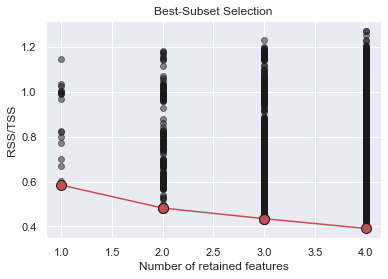

In [19]:
# Plot the validation score for each model
plt.figure(2)
for k in range(1,nsub+1):
    plt.scatter(k*np.ones(validation_err_dict[k].shape), validation_err_dict[k], color='k', alpha=0.5)
    if k > 1:
        plt.plot([k-1, k], [validation_err_min_per_size[k-1], validation_err_min_per_size[k]], color='r',marker='o', 
            markeredgecolor='k', markerfacecolor = 'r', markersize = 10)
plt.xlabel('Number of retained features')
plt.ylabel('RSS/TSS')
plt.title('Best-Subset Selection')
plt.show()

In [20]:
# Pick the number of features for the best subset according to figure above, select the best subset using the results 
# above and learn the model on the entire training data (x_train); eventually compute COD on training (x_train) and 
# on test data (x_test).

# Now pick the number of features according to best subset
opt_num_features = 4
opt_features_idx = features_idx_dict[opt_num_features][validation_err_argmin_per_size[opt_num_features]]

COD_train_BSS, COD_test_BSS, w_hat_BSS = new_solve_LS_problem(
    x_train, y_train, x_test, y_test, opt_features_idx)


# Let's print the indices of the features from best subset
print(f'Best features indexes: {opt_features_idx}')
print(f'Best features names: {str({features_names[i] for i in opt_features_idx})}')

# Let's print model performance on train and test datasets (measured using COD)
print(f"Coefficient of determination on training data: {COD_train_BSS:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_BSS:.4f}")

Best features indexes: (2, 6, 7, 13)
Best features names: {'condition', 'lat', 'sqft_living', 'grade'}
Coefficient of determination on training data: 0.7377
Coefficient of determination on test data:     0.6159


In [21]:
#Ridge regression

In [22]:
def compute_LS_optimal_ridge_ERM_coefficients(x_train : np.ndarray, y_train : np.ndarray, alpha : float) -> np.ndarray:
    
    x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
    xT_x  = x_train.T @ x_train
    w_hat = np.linalg.inv(xT_x + alpha* np.eye(xT_x.shape[0])) @ x_train.T@y_train


    return w_hat


def solve_ridge_LS_problem(x_train : np.ndarray, y_train : np.array, x_test : np.ndarray, y_test : np.array, 
                           alpha : float) -> tuple:
    
    
    clf = linear_model.Ridge(alpha=alpha)
    clf.fit(x_train, y_train)
    COD_train = clf.score(x_train, y_train)
    COD_test = clf.score(x_test, y_test)
    w = np.concatenate((clf.intercept_.reshape(-1,), clf.coef_))
    
    
    return (COD_train, COD_test, w)


alpha = 0.1
w_hat_ridge_hand = compute_LS_optimal_ridge_ERM_coefficients(x_train, y_train, alpha = alpha)
print(f"w_hat \n {w_hat_ridge_hand}")

w_hat 
 [ 2.70963807e-14  4.96447373e-02  1.53991032e-01  1.15539420e-01
 -1.54834907e-01  3.54089396e-02  1.04357712e-02  4.38987138e-02
  4.28915215e-01  1.28758445e-01 -1.94465322e-02 -2.96112115e-01
 -9.63429054e-02 -1.11517166e-01  2.65463206e-01 -1.08608178e-01
  5.12422631e-02  1.64856035e-01]


In [23]:
# Compare ridge regression solution with sklearn one
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
ridge.coef_.shape, ridge.intercept_.shape
w_hat_ridge_sklearn = np.concatenate((ridge.intercept_.reshape(-1,), ridge.coef_))

print(f"w_hat_sklearn \n {w_hat_ridge_sklearn}")
COD_train_ridge, COD_test_ridge, w_hat_ridge = solve_ridge_LS_problem(x_train, y_train, x_test, y_test, alpha)

# Let's print model performance on train and test datasets (measured using COD)
print(f"Coefficient of determination on training data: {COD_train_ridge:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_ridge:.4f}")

assert np.isclose(w_hat_ridge_hand, w_hat_ridge_sklearn, atol=1e-8).all()
assert np.isclose(w_hat_ridge_hand, w_hat_ridge, atol=1e-8).all()

w_hat_sklearn 
 [ 2.71157919e-14  4.96447373e-02  1.53991032e-01  1.15539420e-01
 -1.54834907e-01  3.54089396e-02  1.04357712e-02  4.38987138e-02
  4.28915215e-01  1.28758445e-01 -1.94465322e-02 -2.96112115e-01
 -9.63429054e-02 -1.11517166e-01  2.65463206e-01 -1.08608178e-01
  5.12422631e-02  1.64856035e-01]
Coefficient of determination on training data: 0.7377
Coefficient of determination on test data:     0.6163


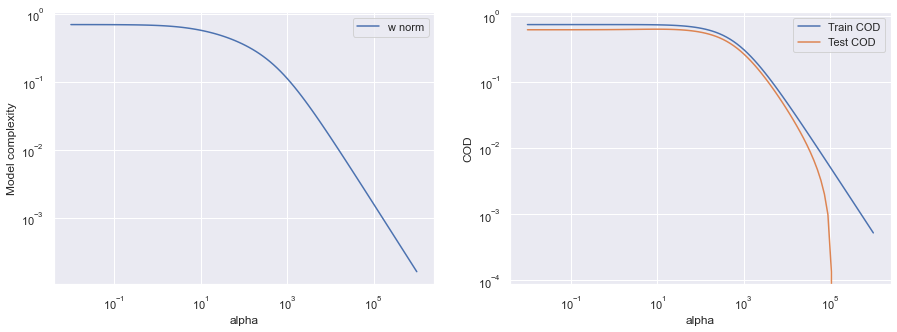

In [24]:
# Let's print model train and test metric as a function of the regularization parameter alpha (which is constraining
# model complexity, the higher the norm of w the higher model complexity)

alphas = np.logspace(-2, 6, 100)
# alphas = np.linspace(1e-2, 1e6, 100)
ridge_results = [solve_ridge_LS_problem(x_train, y_train, x_test, y_test, a) for a in alphas]

train_CODs = list(zip(*ridge_results))[0]
test_CODs = list(zip(*ridge_results))[1]
all_w_hat = list(zip(*ridge_results))[2]

fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(alphas, list(map(np.linalg.norm, all_w_hat)), label='w norm')
axes[0].legend()
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('Model complexity')

axes[1].plot(alphas, train_CODs, label='Train COD')
axes[1].plot(alphas, test_CODs, label='Test COD')
axes[1].legend()
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('COD')


axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

In [25]:
from sklearn.model_selection import KFold

def CV_by_hand(num_folds, model_class, other_model_hyper_parameters, loss, hyper_param_range, x_train, y_train):
    kf = KFold(n_splits = num_folds)
    loss_kfold = np.zeros(len(hyper_param_range),)
    for i in range(len(hyper_param_range)):
        for train_index, validation_index in kf.split(x_train):
            
            x_train_kfold, x_val_kfold = x_train[train_index], x_train[validation_index] # Assign the correct values
            y_train_kfold, y_val_kfold = y_train[train_index], y_train[validation_index] # Assign the correct values
            
            model_kfold = model_class(alpha=hyper_param_range[i], **other_model_hyper_parameters)
            
            model_kfold.fit(x_train_kfold, y_train_kfold)
            
            # Compute the loss using the validation data from the k-fold
            loss_kfold[i] += loss(y_val_kfold, x_val_kfold, model_kfold)

    loss_kfold /= m_t
    
    return loss_kfold

n_alphas, num_folds = 100, 5

alphas = np.logspace(-2, 1.5, n_alphas)

model_class = linear_model.Ridge
other_model_hyper_parameters = {}
loss = lambda y_val, x_val, model: np.linalg.norm(y_val - model.predict(x_val))**2

# Perform CV with your implemented function
loss_ridge_kfold = CV_by_hand(num_folds, model_class, other_model_hyper_parameters, loss, alphas, x_train, y_train)

assert loss_ridge_kfold.shape == (n_alphas,)

# Choose the regularization parameter that minimizes the validation loss
best_index, ridge_alpha_opt = np.argmin(loss_ridge_kfold), alphas[np.argmin(loss_ridge_kfold)]

In [26]:
COD_train_ridge_opt, COD_test_ridge_opt, w_hat_ridge_opt = solve_ridge_LS_problem(x_train, y_train, x_test, y_test, ridge_alpha_opt)

print(f"Best value of the regularization parameter: {ridge_alpha_opt:.4f}")
# Let's print model performance on train and test datasets (measured using COD)
print(f"Coefficient of determination on training data: {COD_train_ridge_opt:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_ridge_opt:.4f}")

Best value of the regularization parameter: 19.4034
Coefficient of determination on training data: 0.7230
Coefficient of determination on test data:     0.6251


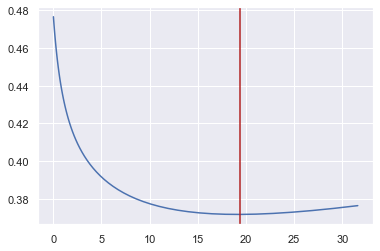

In [27]:
plt.plot(alphas, loss_ridge_kfold)
plt.axvline(x=ridge_alpha_opt, color='firebrick')

In [28]:
#LASSO

In [29]:
# As we did for ridge regression and LS, write a function to solve the Lasso LS Problem exploiting sklearn
def solve_lasso_LS_problem(x_train : np.ndarray, y_train : np.array, x_test : np.ndarray, y_test : np.array, 
                           lam : float) -> tuple:
    
    lasso = linear_model.Lasso(fit_intercept=True, alpha=lam)
    model_train = lasso.fit(x_train, y_train)
                                         
    COD_train = model_train.score(x_train, y_train)
    COD_test = model_train.score(x_test, y_test)
    
    w = np.concatenate((
        model_train.intercept_.reshape(-1,), model_train.coef_))
    
    
    return (COD_train, COD_test, w)


lam = 0.1
COD_train_lasso, COD_test_lasso, w_hat_lasso = solve_lasso_LS_problem(x_train, y_train, x_test, y_test, lam)

# Let's print model performance on train and test datasets (measured using COD)
print(f"Coefficient of determination on training data: {COD_train_lasso:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_lasso:.4f}")

Coefficient of determination on training data: 0.6611
Coefficient of determination on test data:     0.5804


In [30]:
from sklearn.linear_model import lasso_path

num_lambdas = 100

lasso_lams = np.logspace(-3, 0.1, num_lambdas)[::-1]

_, lasso_coefs, _ = lasso_path(x_train, y_train, alphas=lasso_lams)

Text(0, 0.5, 'i-th parameter value')

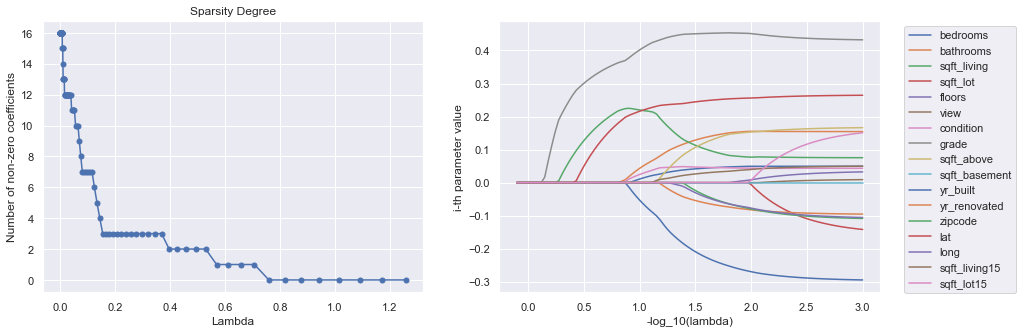

In [31]:
number_non_zero_coeffs = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    coef = lasso_coefs[:, i]
    non_zero = np.where(coef != 0., 1, -0.)
    number_non_zero_coeffs[i] = np.sum(non_zero)

fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(lasso_lams, number_non_zero_coeffs, marker='o', markersize=5)
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('Number of non-zero coefficients')
axes[0].set_title('Sparsity Degree')

neg_log_alphas_lasso = -np.log10(lasso_lams) # This is used only to make a nice plot (you can directly use: lasso_lams as x value)
for i, coef_l in enumerate(lasso_coefs):
    l1 = axes[1].plot(neg_log_alphas_lasso, coef_l, label=features_names[i])
axes[1].legend(bbox_to_anchor=(1.05, 1))
axes[1].set_xlabel('-log_10(lambda)')
axes[1].set_ylabel('i-th parameter value')

In [32]:
# Use Cross-Validation to find the optimal lam. I should use the CV function you implemented earlier.
# Once the omptimal lambda has been found, the following cell will automatically print its training and test error
num_folds, num_lambdas = 5, 100

lambdas = np.logspace(-4.5, -1, num_lambdas)

model_class = linear_model.Lasso
other_model_hyper_parameters = {} 
loss = lambda y_val, x_val, model: np.linalg.norm(y_val - model.predict(x_val))**2

# Perform CV with your implemented function
loss_lasso_kfold = CV_by_hand(num_folds, model_class, other_model_hyper_parameters, loss, lambdas, x_train, y_train)


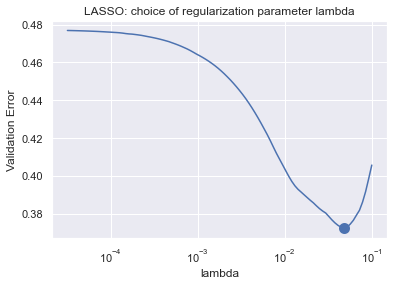

Best value of the regularization parameter: 0.0481
Coefficient of determination on training data: 0.7080
Coefficient of determination on test data:     0.6136
Total number of coefficients: 18
Number of non-zero coefficients: 12


In [33]:
assert loss_lasso_kfold.shape == (num_lambdas,)

# I choose the regularization parameter that minimizes the validation loss
best_index = np.argmin(loss_lasso_kfold)
lasso_lambda_opt = lambdas[best_index]


plt.figure()
plt.plot(lambdas, loss_lasso_kfold, color='b')
plt.scatter(lasso_lambda_opt, loss_lasso_kfold[best_index], color='b', marker='o', linewidths=5)
plt.xlabel('lambda')
plt.ylabel('Validation Error')
plt.title('LASSO: choice of regularization parameter lambda')
plt.xscale('log')
plt.show()

COD_train_lasso_opt, COD_test_lasso_opt, w_hat_lasso_opt = solve_lasso_LS_problem(x_train, y_train, x_test, y_test, 
                                                                                  lasso_lambda_opt)

print(f"Best value of the regularization parameter: {lasso_lambda_opt:.4f}")
# Let's print model performance on train and test datasets (measured using COD)
print(f"Coefficient of determination on training data: {COD_train_lasso_opt:.4f}")
print(f"Coefficient of determination on test data:     {COD_test_lasso_opt:.4f}")
print("Total number of coefficients:", len(w_hat_lasso_opt))
print("Number of non-zero coefficients:", sum(w_hat_lasso_opt != 0))

In [34]:
# Let's print some performance metrics of the models we defined throughout the notebook
columns = ['COD_Train', 'COD_Test']
dict_results = {'LS_full': [COD_train_LS_full, COD_test_LS_full],
                'LS_reduced_hand': [COD_train_LS_reduced, COD_test_LS_reduced],
                'LS_reduced_BSS': [COD_train_BSS, COD_test_BSS],
                'ridge_opt': [COD_train_ridge_opt, COD_test_ridge_opt],
                'lasso_opt': [COD_train_lasso_opt, COD_test_lasso_opt] 
               }
results = pd.DataFrame.from_dict(dict_results, orient='index', columns=columns)
results['Gen_gap'] = np.abs(results['COD_Train'] - results['COD_Test'])
results

,COD_Train,COD_Test,Gen_gap
LS_full,0.737667,0.615915,0.121752
LS_reduced_hand,0.653950,0.587373,0.066577
LS_reduced_BSS,0.737667,0.615915,0.121752
ridge_opt,0.722981,0.625115,0.097865
lasso_opt,0.708004,0.613635,0.094369


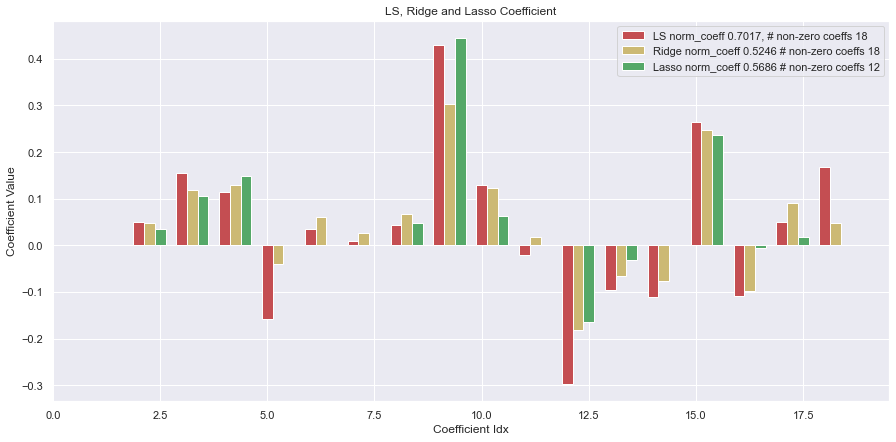

In [35]:
# Let's compare the final coefficients
ind = np.arange(1, len(w_hat_lasso_opt) + 1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(ind,             w_LS_full,        width, color='r', 
                label=f'LS norm_coeff {np.linalg.norm(w_LS_full):.4}, # non-zero coeffs {sum(w_LS_full != 0)}')
rects2 = ax.bar(ind + width,     w_hat_ridge_opt , width, color='y',
               label=f'Ridge norm_coeff {np.linalg.norm(w_hat_ridge_opt):.4} # non-zero coeffs {sum(w_hat_ridge_opt != 0)}')
rects3 = ax.bar(ind + 2 * width, w_hat_lasso_opt , width, color='g',
               label=f'Lasso norm_coeff {np.linalg.norm(w_hat_lasso_opt):.4} # non-zero coeffs {sum(w_hat_lasso_opt != 0)}')
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LS, Ridge and Lasso Coefficient')
plt.legend()